In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV, 
    StratifiedKFold,
    cross_validate,
    ParameterGrid,
    train_test_split
)
from sklearn.metrics import (
    balanced_accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Librerías importadas correctamente")
print(f"Versión de scikit-learn: {__import__('sklearn').__version__}")

Librerías importadas correctamente
Versión de scikit-learn: 1.7.2


In [4]:
df = pd.read_csv('../data/processed/diabetes_sample.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,4.0,2.0
1,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,30.0,0.0,0.0,0.0,7.0,5.0,8.0
2,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,6.0,8.0
3,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
4,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,6.0,8.0


In [5]:
target_col =  'Diabetes_012'
X = df.drop(columns=[target_col])
y = df[target_col]


print("Variables separadas:")
print(f"   X: {X.shape} → {X.shape[1]} features")
print(f"   y: {y.shape} → {y.nunique()} clases")
print(f"Features:")
for i, col in enumerate(X.columns, 1):
    print(f"   {i:2d}. {col}")

Variables separadas:
   X: (38052, 21) → 21 features
   y: (38052,) → 3 clases
Features:
    1. HighBP
    2. HighChol
    3. CholCheck
    4. BMI
    5. Smoker
    6. Stroke
    7. HeartDiseaseorAttack
    8. PhysActivity
    9. Fruits
   10. Veggies
   11. HvyAlcoholConsump
   12. AnyHealthcare
   13. NoDocbcCost
   14. GenHlth
   15. MentHlth
   16. PhysHlth
   17. DiffWalk
   18. Sex
   19. Age
   20. Education
   21. Income


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Datos divididos en entrenamiento y prueba:")
print(f"   X_train: {X_train.shape[0]} samples")   
print(f"   X_test : {X_test.shape[0]} samples")
print(f"   y_train: {y_train.shape[0]} samples")
print(f"   y_test : {y_test.shape[0]} samples")

Datos divididos en entrenamiento y prueba:
   X_train: 30441 samples
   X_test : 7611 samples
   y_train: 30441 samples
   y_test : 7611 samples


In [7]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print(f"Estrategia de validación cruzada: {cv}")

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train), 1):
    y_fold = y_train.iloc[val_idx]
    dist = y_fold.value_counts(normalize=True).sort_index()
    print(f"Fold {fold}: {len(val_idx):,} muestras → {dist.values}")

Estrategia de validación cruzada: StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
Fold 1: 6,089 muestras → [0.84217441 0.01839382 0.13943176]
Fold 2: 6,088 muestras → [0.84231275 0.01823259 0.13945466]
Fold 3: 6,088 muestras → [0.842477   0.01823259 0.13929041]
Fold 4: 6,088 muestras → [0.842477   0.01823259 0.13929041]
Fold 5: 6,088 muestras → [0.842477   0.01823259 0.13929041]


In [8]:
base_model = LogisticRegression(random_state=42)

params = base_model.get_params()

print("Parámetros disponibles del modelo LogisticRegression:")
for param, valor in sorted(params.items()):
    print(f"{param:25s} = {valor}")

Parámetros disponibles del modelo LogisticRegression:
C                         = 1.0
class_weight              = None
dual                      = False
fit_intercept             = True
intercept_scaling         = 1
l1_ratio                  = None
max_iter                  = 100
multi_class               = deprecated
n_jobs                    = None
penalty                   = l2
random_state              = 42
solver                    = lbfgs
tol                       = 0.0001
verbose                   = 0
warm_start                = False


In [9]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],    
    'penalty': ['l2'],                       
    'solver': ['lbfgs', 'saga'],            
    'max_iter': [1000],                      
    'class_weight': ['balanced']            
}

print("\nHiperparámetros a explorar:")
for param, valores in param_grid_lr.items():
    print(f"\n{param}:")
    print(f"   Valores: {valores}")
    print(f"   N° opciones: {len(valores)}")


total_comb = len(list(ParameterGrid(param_grid_lr)))
print(f"\nTOTAL combinaciones: {total_comb}")
print(f"   Con 5-Fold CV: {total_comb * 5} entrenamientos")


Hiperparámetros a explorar:

C:
   Valores: [0.001, 0.01, 0.1, 1, 10, 100]
   N° opciones: 6

penalty:
   Valores: ['l2']
   N° opciones: 1

solver:
   Valores: ['lbfgs', 'saga']
   N° opciones: 2

max_iter:
   Valores: [1000]
   N° opciones: 1

class_weight:
   Valores: ['balanced']
   N° opciones: 1

TOTAL combinaciones: 12
   Con 5-Fold CV: 60 entrenamientos


In [10]:
grid = ParameterGrid(param_grid_lr)

print("\nListado de combinaciones a evaluar:")
for i, params in enumerate(grid, 1):
    print(f"{i:<4} {params['C']:<10.3f} {params['solver']:<12} "
          f"{params['penalty']:<10} {params['class_weight']:<15} {params['max_iter']:<10}")


Listado de combinaciones a evaluar:
1    0.001      lbfgs        l2         balanced        1000      
2    0.001      saga         l2         balanced        1000      
3    0.010      lbfgs        l2         balanced        1000      
4    0.010      saga         l2         balanced        1000      
5    0.100      lbfgs        l2         balanced        1000      
6    0.100      saga         l2         balanced        1000      
7    1.000      lbfgs        l2         balanced        1000      
8    1.000      saga         l2         balanced        1000      
9    10.000     lbfgs        l2         balanced        1000      
10   10.000     saga         l2         balanced        1000      
11   100.000    lbfgs        l2         balanced        1000      
12   100.000    saga         l2         balanced        1000      


In [11]:
# Configurar Grid Search
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid_lr,
    cv=cv,                              # Stratified K-Fold que se definio antes
    scoring='balanced_accuracy',        # Métrica principal (crítica para desbalance)
    n_jobs=-1,                          # Usar todos los cores del CPU
    verbose=2,                          # Nivel de detalle en la salida
    return_train_score=True             # Guardar scores de train para análisis
)

inicio = time.time()

# EJECUTAR LA BÚSQUEDA
grid_search_lr.fit(X_train, y_train)

tiempo_total = time.time() - inicio

print(f"Tiempo total: {tiempo_total/60:.2f} minutos ({tiempo_total:.1f} segundos)")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Tiempo total: 1.76 minutos (105.7 segundos)


In [12]:
mejores_params = grid_search_lr.best_params_
mejor_score = grid_search_lr.best_score_

print("\nMejores hiperparámetros encontrados:")
print("\nConfiguración óptima:")
for param, valor in mejores_params.items():
    print(f"{param:20s} = {valor}")

print(f"\nMejor Balanced Accuracy (CV): {mejor_score:.4f}")

mejor_modelo_lr = grid_search_lr.best_estimator_
print(f"\nEl modelo óptimo ya está entrenado y listo para usar")
print(f"Variable: {mejor_modelo_lr}")


Mejores hiperparámetros encontrados:

Configuración óptima:
C                    = 0.01
class_weight         = balanced
max_iter             = 1000
penalty              = l2
solver               = lbfgs

Mejor Balanced Accuracy (CV): 0.5232

El modelo óptimo ya está entrenado y listo para usar
Variable: LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=42)


In [13]:
results = pd.DataFrame(grid_search_lr.cv_results_)

columns_target = [
    'param_C',
    'param_solver',
    'mean_train_score',
    'std_train_score',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
]

results_subset = results[columns_target].copy()
results_subset = results[columns_target].sort_values(by='rank_test_score')

print("\nResultados resumidos de la búsqueda ordenados por score:")

print(results_subset.to_string(index=False))


Resultados resumidos de la búsqueda ordenados por score:
 param_C param_solver  mean_train_score  std_train_score  mean_test_score  std_test_score  rank_test_score
   0.010        lbfgs          0.530847         0.005244         0.523217        0.017371                1
   0.100        lbfgs          0.531907         0.005412         0.520625        0.016890                2
   1.000        lbfgs          0.532044         0.005190         0.520390        0.017072                3
 100.000        lbfgs          0.532094         0.005239         0.520351        0.017032                4
  10.000        lbfgs          0.532123         0.005202         0.520245        0.017070                5
   0.010         saga          0.527798         0.008217         0.519624        0.012929                6
   0.001        lbfgs          0.526490         0.002444         0.515252        0.017090                7
 100.000         saga          0.526212         0.006515         0.514502        0.007

In [14]:
mejor_c = mejores_params['C']
mejor_solver = mejores_params['solver']
mejor_ba = mejor_score

mejor_idx = grid_search_lr.best_index_
train_score = results.loc[mejor_idx, 'mean_train_score']
test_score = mejor_ba
gap = train_score - test_score


print(f"\nAnálisis de Overfitting:")
print(f"Train BA: {train_score:.4f}")
print(f"Test BA:  {test_score:.4f}")
print(f"Gap:      {gap:.4f}")

if gap < 0.02:
    print(f"Gap pequeño → Buen balance sesgo-varianza")
elif gap < 0.05:
    print(f"Gap moderado → Ligero overfitting")
else:
    print(f"Gap grande → Posible overfitting")


print(f"\nDesempeño por solvers para C = {mejor_c}:")
best_c = results[results['param_C'] == mejor_c]
for _, row in best_c.iterrows():
    solver = row['param_solver']
    ba = row['mean_test_score']
    print(f"{solver:10s}: BA = {ba:.4f}")


Análisis de Overfitting:
Train BA: 0.5308
Test BA:  0.5232
Gap:      0.0076
Gap pequeño → Buen balance sesgo-varianza

Desempeño por solvers para C = 0.01:
lbfgs     : BA = 0.5232
saga      : BA = 0.5196


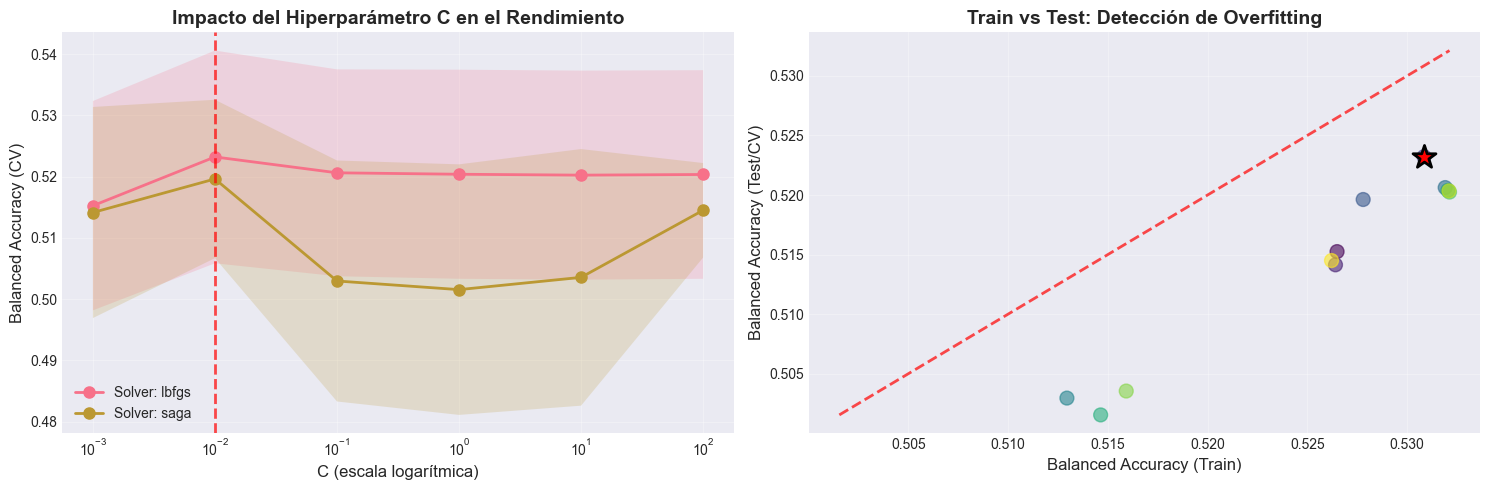

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for solver in ['lbfgs', 'saga']:
    data_solver = results[results['param_solver'] == solver]

    axes[0].plot(
        data_solver['param_C'],
        data_solver['mean_test_score'],
        marker='o',
        label=f'Solver: {solver}',
        linewidth=2,
        markersize=8
    )

    axes[0].fill_between(
        data_solver['param_C'],
        data_solver['mean_test_score'] - data_solver['std_test_score'],
        data_solver['mean_test_score'] + data_solver['std_test_score'],
        alpha=0.2
    )

axes[0].set_xscale('log')
axes[0].set_xlabel('C (escala logarítmica)', fontsize=12)
axes[0].set_ylabel('Balanced Accuracy (CV)', fontsize=12)
axes[0].set_title('Impacto del Hiperparámetro C en el Rendimiento', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].axvline(mejor_c, color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Óptimo: C={mejor_c}')


axes[1].scatter(
    results['mean_train_score'],
    results['mean_test_score'],
    s=100,
    alpha=0.6,
    c=range(len(results)),
    cmap='viridis'
)


min_val = min(results['mean_train_score'].min(), results['mean_test_score'].min())
max_val = max(results['mean_train_score'].max(), results['mean_test_score'].max())
axes[1].plot(
    [min_val, max_val],
    [min_val, max_val],
    color='red',
    linestyle='--',
    linewidth=2,
    alpha=0.7
)

axes[1].set_xlabel('Balanced Accuracy (Train)', fontsize=12)
axes[1].set_ylabel('Balanced Accuracy (Test/CV)', fontsize=12)
axes[1].set_title('Train vs Test: Detección de Overfitting', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

best_training = results.loc[mejor_idx, 'mean_train_score']
best_test = mejor_score

axes[1].scatter(best_training, best_test, s=300, c='red', marker='*', 
                edgecolors='black', linewidth=2, label='Mejor modelo', zorder=5)

plt.tight_layout()
plt.show()

In [17]:
y_pred_test = mejor_modelo_lr.predict(X_test)
y_pred_proba = mejor_modelo_lr.predict_proba(X_test)

ba_test = balanced_accuracy_score(y_test, y_pred_test)
f1_macro = f1_score(y_test, y_pred_test, average='macro')
f1_weighted = f1_score(y_test, y_pred_test, average='weighted')

print(f"\nMÉTRICAS EN TEST SET:")
print(f"Balanced Accuracy: {ba_test:.4f}")
print(f"F1-Score (Macro):  {f1_macro:.4f}")
print(f"F1-Score (Weighted): {f1_weighted:.4f}")

print(f"\nComparación CV vs Test:")
print(f"CV (validación cruzada): {mejor_score:.4f}")
print(f"Test (datos no vistos):  {ba_test:.4f}")
print(f"Diferencia: {abs(mejor_score - ba_test):.4f}")


MÉTRICAS EN TEST SET:
Balanced Accuracy: 0.4943
F1-Score (Macro):  0.4191
F1-Score (Weighted): 0.7170

Comparación CV vs Test:
CV (validación cruzada): 0.5232
Test (datos no vistos):  0.4943
Diferencia: 0.0289


In [18]:
target_names = ['No Diabetes', 'Pre-diabetes', 'Diabetes']
print(classification_report(y_test, y_pred_test, target_names=target_names, digits=4))

              precision    recall  f1-score   support

 No Diabetes     0.9488    0.6594    0.7781      6412
Pre-diabetes     0.0241    0.2302    0.0437       139
    Diabetes     0.3441    0.5934    0.4356      1060

    accuracy                         0.6424      7611
   macro avg     0.4390    0.4943    0.4191      7611
weighted avg     0.8477    0.6424    0.7170      7611

